In [1]:
###################################################################################

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]='3'
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

image_data_gen = tf.keras.preprocessing.image.ImageDataGenerator()


Num GPUs Available:  0


In [4]:
train_path = "C:/Users/shubh/OneDrive/Desktop/IITP/Expeeriment Set3/train"
test_path =  "C:/Users/shubh/OneDrive/Desktop/IITP/Expeeriment Set3/On_Off"


In [5]:
training_set = image_data_gen.flow_from_directory(
    directory=train_path,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    shuffle=True
)

Found 1300 images belonging to 130 classes.


In [6]:
test_set = image_data_gen.flow_from_directory(
    directory=test_path,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    shuffle=False  # No need to shuffle for testing
)

Found 260 images belonging to 130 classes.


In [7]:
input = tf.keras.layers.Input(shape=(256, 256, 3))
x = tf.keras.applications.vgg19.preprocess_input(input)
base_model = tf.keras.applications.VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3),
    pooling=None
)

output = base_model(x)
output = Flatten()(output)
output = Dense(130, activation='softmax')(output)
model = tf.keras.Model(inputs=input, outputs=output)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 256, 256)          │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_1 (GetItem)          │ (None, 256, 256)          │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_2 (GetItem)          │ (None, 256, 256)          │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stack (Stack)                 │ (None, 256, 256, 3)       │               0 │ get_item[0][0],            │
│                               │                           │                 │ get_item_1[0][0],          │
│                               │                           │                 │ get_item_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 256, 256, 3)       │               0 │ stack[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ vgg19 (Functional)            │ (None, 8, 8, 512)         │      20,024,384 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 32768)             │               0 │ vgg19[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 130)               │       4,259,970 │ flatten[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 24,284,354 (92.64 MB)

 Trainable params: 24,284,354 (92.64 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
num_epochs = 2
checkpoint_filepath = r"C:/Users/shubh/OneDrive/Desktop/IITP/Result.weights.h5"
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.000001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", save_best_only=True, save_weights_only=True)
]
history = model.fit(
    training_set,
    epochs=num_epochs,
    callbacks=callbacks
)

Epoch 1/2


C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 519s 6s/step - accuracy: 0.0094 - loss: 5.6103 - learning_rate: 1.0000e-04
Epoch 2/2


C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 522s 6s/step - accuracy: 0.0047 - loss: 4.8698 - learning_rate: 1.0000e-04


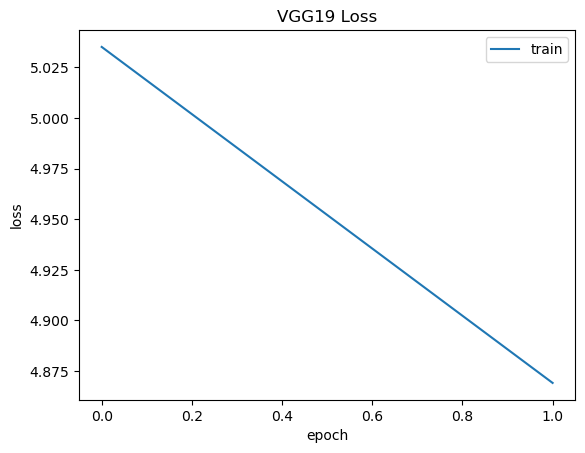

In [9]:
plt.plot(history.history['loss'])
plt.title('VGG19 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.savefig('./loss.png')
plt.show()
plt.close()


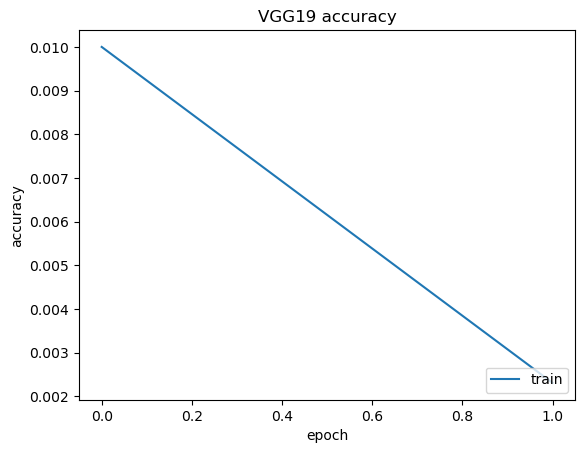

In [10]:
plt.plot(history.history['accuracy'])
plt.title('VGG19 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.savefig('./accuracy.png')
plt.show()
plt.close()

In [17]:
import sys
import os

In [18]:
os.getcwd()

'C:\\Users\\shubh\\OneDrive\\Desktop\\IITP'

In [15]:
sys.path.append( "C:/Users/shubh/OneDrive/Desktop/IITP/")

In [19]:
#model.load_weights(checkpoint_filepath)
_, accuracy = model.evaluate(test_set)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
with open('./results.txt', 'a',encoding='utf-8') as f:
    f.write(f"Test accuracy: {round(accuracy * 100, 2)}%.\n")


17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.0243 - loss: 4.8675
Test accuracy: 0.77%


In [24]:
model.save("My_Model.h5")

TypeError: Cannot serialize object Ellipsis of type <class 'ellipsis'>. To be serializable, a class must implement the `get_config()` method.

In [ ]:
model1 = 